In [18]:
# !pip install pyarrow
# !pip install fastparquet
import sys
import os
import pandas as pd
import seaborn as sns



In [4]:
df_all = pd.DataFrame()
for i in range(1,5):
    print(i)
    df = pd.read_parquet(f'../data/temp_data{i}.parquet')
    df_all = pd.concat([df_all,df], axis=0)

print(df_all.info())

1
2
3
4
<class 'pandas.core.frame.DataFrame'>
Index: 19740000 entries, fLQPCoYBZfb-6lJn8bNm to zZNJfYYBZfb-6lJnVlhu
Data columns (total 12 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   date        object
 1   @timestamp  object
 2   hostname    object
 3   location    object
 4   cpu1        int64 
 5   cpu2        int64 
 6   power       int64 
 7   kiosk       int64 
 8   rack        int64 
 9   chassis     int64 
 10  blade       int64 
 11  cpus_alloc  int64 
dtypes: int64(8), object(4)
memory usage: 1.9+ GB
None


In [13]:
df = df_all.reset_index(drop=True)

df = df.drop('@timestamp', axis=1)
df['date'] = pd.to_datetime(df['date'])


In [15]:
df.head()

,date,hostname,location,cpu1,cpu2,power,kiosk,rack,chassis,blade,cpus_alloc
0,2023-02-01 00:01:01+01:00,e2120,k06r17c02b16,50,47,572,6,17,2,16,48
1,2023-02-01 00:01:01+01:00,e2109,k06r17c02b05,50,47,568,6,17,2,5,48
2,2023-02-01 00:01:01+01:00,e2207,k06r18c04b07,49,47,552,6,18,4,7,48
3,2023-02-01 00:01:01+01:00,e2147,k06r17c04b11,49,44,500,6,17,4,11,47
4,2023-02-01 00:01:01+01:00,e2396,k06r21c04b04,44,46,492,6,21,4,4,44


In [16]:
df.describe()

,cpu1,cpu2,power,kiosk,rack,chassis,blade,cpus_alloc
count,1.974000e+07,1.974000e+07,1.974000e+07,19740000.0,1.974000e+07,1.974000e+07,1.974000e+07,1.974000e+07
mean,3.674643e+01,3.390597e+01,2.731155e+02,6.0,9.700036e+00,2.494868e+00,8.450577e+00,2.593011e+01
std,8.430784e+00,7.175370e+00,1.352134e+02,0.0,6.486196e+00,1.103700e+00,4.615870e+00,1.807504e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,6.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.900000e+01,2.800000e+01,1.440000e+02,6.0,4.000000e+00,2.000000e+00,4.000000e+00,8.000000e+00
50%,3.500000e+01,3.100000e+01,2.320000e+02,6.0,9.000000e+00,3.000000e+00,8.000000e+00,2.400000e+01
75%,4.500000e+01,4.100000e+01,3.640000e+02,6.0,1.500000e+01,3.000000e+00,1.200000e+01,4.800000e+01
max,7.800000e+01,5.800000e+01,6.400000e+02,6.0,2.100000e+01,4.000000e+00,1.600000e+01,4.800000e+01


<AxesSubplot:>

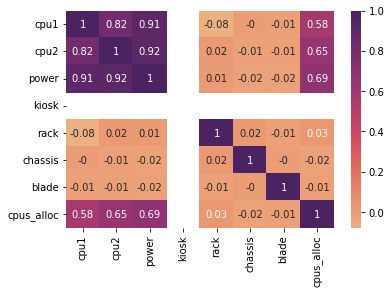

In [19]:
sns.heatmap(df.corr().round(2), annot=True, cmap='flare')


<AxesSubplot:>

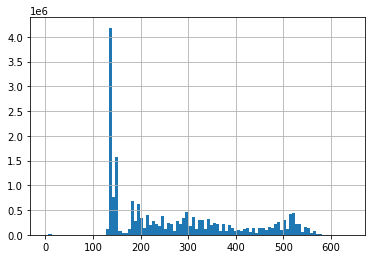

In [28]:
df['power'].hist(bins=100)

140    1650305
136     830997
148     684766
144     394315
152      75544
        ...   
324          1
360          1
348          1
344          1
584          1
Name: power, Length: 85, dtype: int64

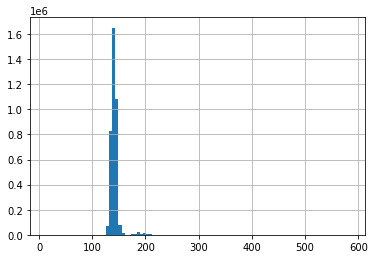

In [31]:
df_nocpu = df[df['cpus_alloc'] == 0]
df_nocpu['power'].hist(bins=100)
df_nocpu['power'].value_counts()

<AxesSubplot:>

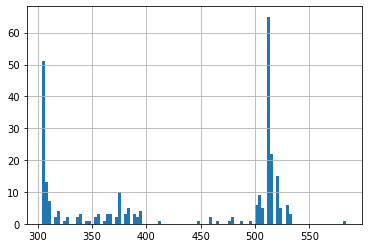

In [30]:
# df_nocpu = df_nocpu[df_nocpu['power'] > 300]

# df_nocpu['power'].hist(bins=100)

In [34]:
print(df_nocpu['hostname'].unique())

['e1924' 'e1448' 'e1443' ... 'e1502' 'e1487' 'e1499']


In [41]:
for elem in df_nocpu['hostname'].unique():
    if df_nocpu[df_nocpu['hostname'] == elem]['power'].mean() > 150:
        print(elem, df_nocpu[df_nocpu['hostname'] == elem]['power'].mean())

e1999 196.7853982300885
e1817 156.3126843657817
e1456 161.80406001765226
e2002 169.73529411764707
e1451 186.07294011706438
e1997 169.8605072463768
e1998 164.8228176318064
e1441 183.25610859728508
e1993 173.86296462158532
e2214 153.9330570608862
e2154 151.12166172106825
e2206 151.09585798816568
e2204 151.00452488687782
e1239 182.28731762065095
e1245 163.60476190476192
e2191 152.58536585365854
e2338 152.52027972027972
e1513 151.66961651917404
e1676 189.4432466708941
e1212 175.31214627775358
e1152 173.73584905660377
e1156 155.7989417989418
e2282 150.9785575048733
e2294 152.2716468590832
e2305 152.1025897660453
e2309 150.1080227416298
e2362 152.96503496503496
e2232 152.0978345536688
e1938 153.5641891891892
e1651 168.8362120309708
e1653 160.5051094890511
e1650 150.09822895745847
e2198 152.58260019550343
e1994 179.0570273911091
e1935 182.89521165857045
e1929 167.78309986443742
e1996 174.01570438799075
e1932 169.53398058252426
e1931 168.86638194020745
e2159 152.8969696969697
e2157 150.0550847